In [0]:
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import numpy as np


import json
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
mohler_data_path = "/content/drive/My Drive/Colab Notebooks/RnD/dataset/datasets/mohler/cleaned"
answers_with_similarity_score = pd.read_csv(mohler_data_path+'/answers_with_similarity_score.csv', skiprows= [2273,2274,2275,2276,2277,2278,2279])

In [0]:
answers = answers_with_similarity_score.answer.to_list()

## Creating sentence embeddings

In [0]:
class GetSentenceEmbeddings:
  def __init__(self, sentence):
    self.sentence = sentence
    self.tokenized_sent = word_tokenize(self.sentence)

  def bert(self):
    bert_embedding = BertEmbedding().embedding(sentences = self.tokenized_sent)
    word_array = []
    for i in range(len(bert_embedding)):
      word_array.append(bert_embedding[i][1][0])
    return sum(word_array)
  

In [0]:
# answers_embed_list = []

# for i in range(0, len(answers_list)):
#   sentence_embed = GetSentenceEmbeddings(answers_list[i])
#   answer_embedding = sentence_embed.bert()
#   answers_embed_list.append(answer_embedding)

In [0]:
# with open('/home/sgaddi2s/sasi_rnd/mohler_experimentation/answers_sentence_embedding.json', 'w', encoding='utf-8') as f:
#     json.dump(answers_embed_dict, f, ensure_ascii=False, indent=4)

## Plotting

In [0]:
class PreProcessing:
  def __init__(self):
    self.mohler_data_path = "/content/drive/My Drive/Colab Notebooks/RnD/dataset/datasets/mohler/cleaned"
    
  def get_answers(self,answer_id=None):
    """
      The function returns the list of answers and corresponding answers for the given id
    @param
    answer_id : float
      The answer id 
    @returns : lists
      The answers list and corresponding scores list
    >>answer_list, score_list
    """    
    answers_with_similarity_score = pd.read_csv(self.mohler_data_path+'/answers_with_similarity_score.csv', skiprows= [2273,2274,2275,2276,2277,2278,2279])  
    if not answer_id:
      
      answer_list = answers_with_similarity_score.answer.to_list()
      score_list = answers_with_similarity_score.score_avg.to_list()
      score_list = [round(x) for x in score_list]
      return answer_list,score_list
    
    answer_list = answers_with_similarity_score[answers_with_similarity_score.id == answer_id].answer.to_list()
    score_list = answers_with_similarity_score[answers_with_similarity_score.id == answer_id].score_avg.to_list()
    score_list = [round(x) for x in score_list]
    return answer_list, score_list


In [0]:
def kmeans(X, n_clusters):
  kmeans = KMeans(n_clusters=n_clusters, random_state=111)
  kmeans.fit(X)
  return kmeans

In [0]:
class DimReduction:

  def __init__(self, answer_list):
    self.answer_list = answer_list

  def pca(self, model_dict, embedding_list):

    labels = []
    tokens = []

    for answer in self.answer_list:
        tokens.append(model_dict[answer])
        labels.append(answer)
    
    pca = PCA(n_components=3, random_state=23).fit(tokens)
    new_values = pca.transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    return x, y
    
  def tsne(self, model_dict, embedding_list):

    labels = []
    tokens = []

    for answer in self.answer_list:
        tokens.append(model_dict[answer])
        labels.append(answer)
      
    tsne = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values =  tsne.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    return x,y

  def u_map(self, model_dict, embedding_list):

      labels = []
      tokens = []

      for answer in self.answer_list:
          tokens.append(model_dict[answer])
          labels.append(answer)
        
      trans = umap.UMAP(n_neighbors=5, random_state=23).fit(tokens)
      new_values =  trans.embedding_

      x = []
      y = []
      for value in new_values:
          x.append(value[0])
          y.append(value[1])

      return x,y




In [0]:
plt.rc('font', family='serif', weight='bold')
plt.rc('lines', lw=2)
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
plt.rc('axes', linewidth=2)

In [0]:
class Plotting:
  def __init__(self,score_list=None, kmeans_labels=None, n_clusters = None):
    self.score_list=score_list
    self.kmeans_labels = kmeans_labels
    self.n_clusters = n_clusters
    

  def interactive_plot(self,x,y, title_name):
    if self.score_list:
      fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers',marker_color = self.score_list,text=self.score_list, marker=dict(
        colorscale='Viridis', # one of plotly colorscales
        showscale=True
     )))  
    else:
      fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers',marker_color = self.kmeans_labels, text=self.score_list, marker=dict(
        colorscale='Viridis', # one of plotly colorscales
        showscale=True
    )))
    fig.update_layout(title={
        'text': title_name,
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
  
  def formal_plot(self,x,y, title_name):
    if self.kmeans_labels:
      sns.scatterplot(x,y, hue=self.kmeans_labels)
      plt.title(title_name)
      plt.show()
    else:
      
      sns.set_context('paper')
      sns.scatterplot(x,y,hue=self.score_list, hue_order=[0,1,2,3,4,5], s=50, palette=sns.color_palette("Blues",6))
      plt.legend(title='Assinged grades')

      plt.xlabel('first dimension', fontsize=14, weight='bold')      
      plt.ylabel('second dimension', fontsize=14, weight='bold')
      plt.title(title_name, fontsize=14, weight='bold')
      plt.show()

    

In [0]:
class Models:
  
  def __init__(self, answer_list,n_clusters=5, score_list = None):
    self.EMBED_PATH = "/content/drive/My Drive/Colab Notebooks/RnD/weights/"
    self.MOHLER_PATH = "/content/drive/My Drive/Colab Notebooks/RnD/dataset/datasets/mohler/cleaned"
    self.answers_with_similarity_score = pd.read_csv(self.MOHLER_PATH+'/answers_with_similarity_score.csv', skiprows= [2273,2274,2275,2276,2277,2278,2279])
    self.answer_list = answer_list
    self.score_list= score_list
    self.n_clusters = n_clusters
  
  def bert(self, dim_red='pca'):    
    with open(self.EMBED_PATH+"bert_sentence_embeddings.json", 'r') as json_file:
      bert_answers_embeddings = json.load(json_file)

    answer_embeddings_dict = dict()

    for answer in self.answer_list:
      answer_embeddings_dict[answer] = bert_answers_embeddings[answer]
    
    X_bert = list(answer_embeddings_dict.values())
    
    dimension_reduction = DimReduction(self.answer_list)
    plotting = Plotting(self.score_list)

    model_name = 'BERT'

    if dim_red == 'pca':
      x,y = dimension_reduction.pca(answer_embeddings_dict, X_bert)
      # plotting.formal_plot(x,y, title_name = model_name+' - '+'PCA')
      return x,y
    elif dim_red == 'tsne':
      x,y=dimension_reduction.tsne(answer_embeddings_dict, X_bert)
      # plotting.formal_plot(x,y, title_name = model_name+' - '+'TSNE')
      return x,y
    elif dim_red == 'umap':
      x,y=dimension_reduction.u_map(answer_embeddings_dict, X_bert)
      # plotting.formal_plot(x,y, title_name = model_name+' - '+'UMAP')
      return x,y
  def elmo(self, dim_red = 'pca'):
    
    with open(self.EMBED_PATH+"elmo_sentence_embeddings.json", 'r') as json_file:
      elmo_answers_embeddings = json.load(json_file) 
    
    answer_embeddings_dict = dict()
    for answer in self.answer_list:
      answer_embeddings_dict[answer] = elmo_answers_embeddings[answer]
    
    X_elmo = list(answer_embeddings_dict.values())

    dimension_reduction = DimReduction(self.answer_list)
    plotting = Plotting(self.score_list)

    model_name = 'ELMo'

    if dim_red == 'pca':
      x,y = dimension_reduction.pca(answer_embeddings_dict, X_elmo)
      # plotting.formal_plot(x,y, title_name = model_name+' - '+'PCA')
      return x,y
    elif dim_red == 'tsne':
      x,y=dimension_reduction.tsne(answer_embeddings_dict, X_elmo)
      # plotting.formal_plot(x,y, title_name = model_name+' - '+'TSNE')
      return x,y
    elif dim_red == 'umap':
      x,y=dimension_reduction.u_map(answer_embeddings_dict, X_elmo)
      # plotting.formal_plot(x,y, title_name = model_name+' - '+'UMAP')
      return x,y
      
    

In [15]:
pre_processing = PreProcessing()
id_list = answers_with_similarity_score.id.unique()
id_list = np.random.choice(id_list, 64, replace=False)
print(id_list)

[ 9.1 12.2  3.1  7.1  8.2  3.3  6.2  1.4  8.1  4.4 12.5  6.1  7.3  1.7
  2.7  3.7 10.7  1.2  7.2 11.6  6.7 12.8 11.8  2.6  6.4  9.4 12.1  6.5
  1.3 11.3 12.4  1.6 10.3 11.5 12.9 12.6 11.4  5.1 11.7  5.3 10.5  9.2
  3.6  3.5  3.4  7.6 10.4 11.2  1.5 11.9  4.3 10.1  1.1  8.3  6.3  8.7
 12.7  2.2  9.3  5.4  7.5  4.2  6.6  5.2]


9.1 2
12.2 3
3.1 4
7.1 5
8.2 6
3.3 7
6.2 8
1.4 9
8.1 10
4.4 11
12.5 12
6.1 13
7.3 14
1.7 15
2.7 16
3.7 17
10.7 18
1.2 19
7.2 20
11.6 21
6.7 22
12.8 23
11.8 24
2.6 25
6.4 26
9.4 27
12.1 28
6.5 29
1.3 30
11.3 31
12.4 32
1.6 33
10.3 34
11.5 35
12.9 36
12.6 37
11.4 38
5.1 39
11.7 40
5.3 41
10.5 42
9.2 43
3.6 44
3.5 45
3.4 46
7.6 47
10.4 48
11.2 49
1.5 50
11.9 51
4.3 52
10.1 53
1.1 54
8.3 55
6.3 56
8.7 57
12.7 58
2.2 59
9.3 60
5.4 61
7.5 62
4.2 63
6.6 64
5.2 65


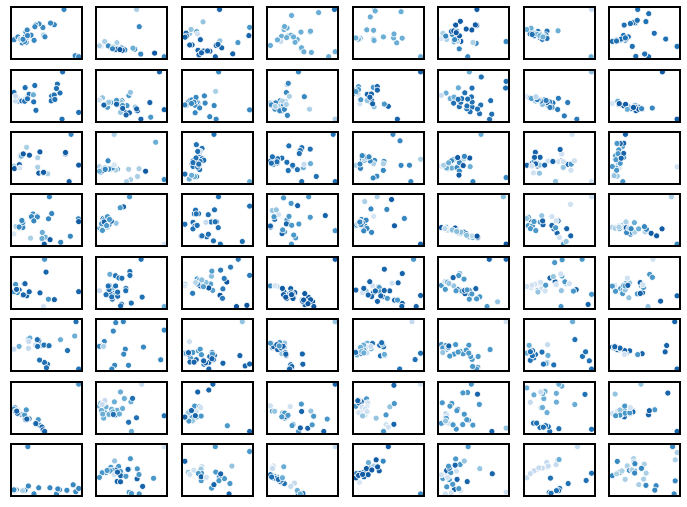

In [16]:
i=1
plt.figure(figsize=(12,9))
for num in id_list:
  answers_id, scores_id = pre_processing.get_answers(num)
  interactive_plot = Models(answers_id, score_list=scores_id)
  pca_x, pca_y = interactive_plot.bert('pca')
  tsne_x, tsne_y = interactive_plot.bert('tsne')
  umap_x, umap_y = interactive_plot.bert('umap')

# for i in range(1,31):
  
  plt.subplot(8, 8, i)
  sns.scatterplot(pca_x, pca_y, hue=scores_id, legend=False, palette=sns.color_palette("Blues",len(set(scores_id))))
  plt.xticks([])
  plt.yticks([])
  i+=1
  print(num, i)

  # if i%3 == 2:
  #   sns.scatterplot(tsne_x, tsne_y, hue=scores_1, legend=False)
  #   plt.title('tsne')
  #   plt.xticks([])
  #   plt.yticks([])
  # i+=1

  # if i%3 == 0:
  #   sns.scatterplot(umap_x, umap_y, hue=scores_1, legend=False)
  #   plt.title('Umap')
  #   plt.xticks([])
  #   plt.yticks([])
  # i+=1

# plt.title('PCA for random answers')
plt.show()

In [17]:
interactive_plot.bert('pca')
interactive_plot.bert('tsne')
interactive_plot.bert('umap')

([16.440857,
  16.538956,
  2.6852012,
  7.656188,
  6.689591,
  4.265197,
  16.69092,
  3.1639407,
  7.174,
  5.8324866,
  7.2530947,
  3.0645459,
  6.7827697,
  6.5455694,
  16.828426,
  3.4860175,
  6.8289914,
  2.8315244,
  6.232658,
  7.3925643,
  7.031681,
  7.3909454,
  6.0005064,
  7.084208,
  6.8023586,
  16.351118,
  7.3161383,
  6.812637],
 [-1.1769617,
  -1.2750685,
  9.888963,
  10.737255,
  10.430812,
  8.662946,
  -1.4270543,
  9.385135,
  11.110362,
  7.468232,
  9.882527,
  9.51921,
  5.721343,
  6.096134,
  -1.5645496,
  9.161925,
  10.052606,
  9.746844,
  7.4624968,
  10.743515,
  6.0492954,
  10.359133,
  6.912351,
  6.9268575,
  6.4634852,
  -1.0872353,
  6.2353187,
  11.229882])

In [0]:
# class DimReduction:

#   def __init__(self, answer_list, n_clusters=5, score_list = False):
#     self.answer_list = answer_list
#     self.n_clusters = n_clusters 
#     self.score_list = score_list
  
#   def pca(self, model_dict, embedding_list, title_name):

#     labels = []
#     tokens = []

#     for answer in self.answer_list:
#         tokens.append(model_dict[answer])
#         labels.append(answer)

#     pca = PCA(n_components=3, random_state=23).fit(tokens)
#     new_values = pca.transform(tokens)

#     kmeans_bert = kmeans(embedding_list, self.n_clusters)

#     x = []
#     y = []
#     for value in new_values:
#         x.append(value[0])
#         y.append(value[1])
    
#     if self.score_list:
#       fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers',marker_color = get_scores(labels),text=get_scores(labels), marker=dict(
#         colorscale='Viridis', # one of plotly colorscales
#         showscale=True
#      )))  
#     else:
#       fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers',marker_color = kmeans_bert.labels_,text=labels, marker=dict(
#         colorscale='Viridis', # one of plotly colorscales
#         showscale=True
#     )))
#     fig.update_layout(title={
#         'text': title_name,
#         'y':0.9,
#         'x':0.5,
#         'xanchor': 'center',
#         'yanchor': 'top'})
#     fig.show()
  
#   def tsne(self, model_dict, embedding_list, title_name):

#     labels = []
#     tokens = []

#     for answer in self.answer_list:
#         tokens.append(model_dict[answer])
#         labels.append(answer)
      
#     tsne = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
#     new_values =  tsne.fit_transform(tokens)

#     kmeans_bert = kmeans(embedding_list, self.n_clusters)

#     x = []
#     y = []
#     for value in new_values:
#         x.append(value[0])
#         y.append(value[1])

#     if self.score_list:
#       fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers',marker_color = get_scores(labels),text=get_scores(labels),marker=dict(
#         colorscale='Viridis', # one of plotly colorscales
#         showscale=True
#     )))  
#     else:
#       fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers',marker_color = kmeans_bert.labels_,text=labels,marker=dict(
#         colorscale='Viridis', # one of plotly colorscales
#         showscale=True
#     )))
#     fig.update_layout(title={
#         'text': title_name,
#         'y':0.9,
#         'x':0.5,
#         'xanchor': 'center',
#         'yanchor': 'top'})
#     fig.show()

#   def u_map(self, model_dict, embedding_list, title_name):

#       labels = []
#       tokens = []

#       for answer in self.answer_list:
#           tokens.append(model_dict[answer])
#           labels.append(answer)
        
#       trans = umap.UMAP(n_neighbors=5, random_state=23).fit(tokens)
#       new_values =  trans.embedding_

#       kmeans_bert = kmeans(embedding_list, self.n_clusters)

#       x = []
#       y = []
#       for value in new_values:
#           x.append(value[0])
#           y.append(value[1])

#       if self.score_list:
#         fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers',marker_color = get_scores(labels),text=get_scores(labels), marker=dict(
#         colorscale='Viridis', # one of plotly colorscales
#         showscale=True
#     )))  
#       else:
#         fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers',marker_color = kmeans_bert.labels_,text=labels, marker=dict(
#         colorscale='Viridis', # one of plotly colorscales
#         showscale=True
#     )))
#       fig.update_layout(title={
#           'text': title_name,
#           'y':0.9,
#           'x':0.5,
#           'xanchor': 'center',
#           'yanchor': 'top'})
#       fig.show()


